In [2]:
import os
import numpy as np
import pandas as pd 

# dirPath = os.path.join(os.getcwd(),'m5-forecasting-accuracy')
# for dirname, _, filenames in os.walk(dirPath):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm
sales = pd.read_csv('m5-forecasting-accuracy/sales_train_validation.csv')
price = pd.read_csv("m5-forecasting-accuracy/sell_prices.csv")
calendar = pd.read_csv("m5-forecasting-accuracy/calendar.csv")

#How many weeks in calendar.
print('weeks: ', len(calendar['wm_yr_wk'].drop_duplicates()))


#Verify missing value in calendar.
for e in calendar.columns:
    print('Null', e,':', calendar[e].isnull().sum(), ' --- Percent: ', round(calendar[e].isnull().sum() / len(calendar), 4))

    
#Verify holidays
event_name_1 = calendar['event_name_1'].value_counts(dropna = False) #30
event_type_1 = calendar['event_type_1'].value_counts(dropna = False) #4
event_name_2 = calendar['event_name_2'].value_counts(dropna = False) #4
event_type_2 = calendar['event_type_2'].value_counts(dropna = False) #2


#Verify SNAP days
#49.28% are snap days
snap_CA = calendar['snap_CA'].value_counts(dropna = False) 
snap_TX = calendar['snap_TX'].value_counts(dropna = False)
snap_WI = calendar['snap_WI'].value_counts(dropna = False)

print('event_name_1:')
display(event_name_1)
print('')
print('event_type_1:')
display(event_type_1)
print('')
print('event_name_2:')
display(event_name_2)
print('')
print('event_type_2:')
display(event_type_2)
print('')
print('snap_CA:')
display(snap_CA)
print('')
print('snap_TX:')
display(snap_TX)
print('')
print('snap_WI:')
display(snap_WI)
print('')
display(calendar.head())

weeks:  282
Null date : 0  --- Percent:  0.0
Null wm_yr_wk : 0  --- Percent:  0.0
Null weekday : 0  --- Percent:  0.0
Null wday : 0  --- Percent:  0.0
Null month : 0  --- Percent:  0.0
Null year : 0  --- Percent:  0.0
Null d : 0  --- Percent:  0.0
Null event_name_1 : 1807  --- Percent:  0.9177
Null event_type_1 : 1807  --- Percent:  0.9177
Null event_name_2 : 1964  --- Percent:  0.9975
Null event_type_2 : 1964  --- Percent:  0.9975
Null snap_CA : 0  --- Percent:  0.0
Null snap_TX : 0  --- Percent:  0.0
Null snap_WI : 0  --- Percent:  0.0
event_name_1:


NaN                    1807
NBAFinalsEnd              6
NBAFinalsStart            6
Ramadan starts            6
Pesach End                6
MemorialDay               6
PresidentsDay             6
Mother's day              6
LentWeek2                 6
SuperBowl                 6
Purim End                 6
ValentinesDay             6
LentStart                 6
StPatricksDay             6
EidAlAdha                 5
Cinco De Mayo             5
OrthodoxChristmas         5
OrthodoxEaster            5
Easter                    5
VeteransDay               5
Eid al-Fitr               5
MartinLutherKingDay       5
ColumbusDay               5
IndependenceDay           5
LaborDay                  5
Thanksgiving              5
Christmas                 5
NewYear                   5
Halloween                 5
Chanukah End              5
Father's day              4
Name: event_name_1, dtype: int64


event_type_1:


NaN          1807
Religious      55
National       52
Cultural       37
Sporting       18
Name: event_type_1, dtype: int64


event_name_2:


NaN               1964
Father's day         2
OrthodoxEaster       1
Cinco De Mayo        1
Easter               1
Name: event_name_2, dtype: int64


event_type_2:


NaN          1964
Cultural        4
Religious       1
Name: event_type_2, dtype: int64


snap_CA:


0    1319
1     650
Name: snap_CA, dtype: int64


snap_TX:


0    1319
1     650
Name: snap_TX, dtype: int64


snap_WI:


0    1319
1     650
Name: snap_WI, dtype: int64

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [279]:
#Verify missing value in sell prices.
for e in price.columns:
    print('Null', e,':', price[e].isnull().sum(), ' --- Percent: ', round(price[e].isnull().sum() / len(price), 4))
    
display(price.head())

Null store_id : 0  --- Percent:  0.0
Null item_id : 0  --- Percent:  0.0
Null wm_yr_wk : 0  --- Percent:  0.0
Null sell_price : 0  --- Percent:  0.0


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


Have 3049 different item_id.


In [297]:
#Verify the quantity of items and store. 
print('Total: ', len(price.item_id.unique()), 'items.')
print('Total: ',len(price.store_id.unique()), 'stores.')
print('Total: ',len(sales.state_id.unique()), 'states:', sales.state_id.unique())
print('CA have', len(sales[sales.state_id == 'CA'].store_id.unique()), 'stores.')
print('TX have', len(sales[sales.state_id == 'TX'].store_id.unique()), 'stores.')
print('WI have', len(sales[sales.state_id == 'WI'].store_id.unique()), 'stores.')


# #Verify null in sales_train_validation
# print('Verify null:')
# print(sales.isnull().sum()[sales.isnull().sum() > 0]) #there is no null values.
# print(sales.isnull().sum()[sales.isnull().sum() > 0] / len(sales))
# sales.head()

Total:  3049 items.
Total:  10 stores.
Total:  3 states: ['CA' 'TX' 'WI']
CA have 4 stores.
TX have 3 stores.
WI have 3 stores.


330    2011-12-25
Name: date, dtype: object
337    2012-01-01
Name: date, dtype: object
696    2012-12-25
Name: date, dtype: object
702    2012-12-31
Name: date, dtype: object
1061    2013-12-25
Name: date, dtype: object
1067    2013-12-31
Name: date, dtype: object
1426    2014-12-25
Name: date, dtype: object
1432    2014-12-31
Name: date, dtype: object
1791    2015-12-25
Name: date, dtype: object
1797    2015-12-31
Name: date, dtype: object


(0.0, 65000.0)

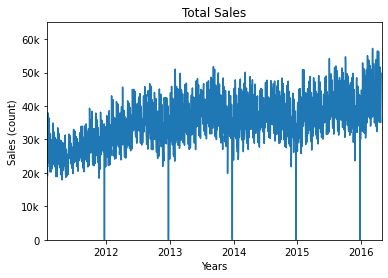

In [243]:
#  HOBBIES/HOUSEHOLD/FOODS sales
# 1. day1~day1919 aggregate sales

salesArray = []
for i in range(1, 1914):
    salesArray.append([sales['d_'+str(i)].sum()])
    if sales['d_'+str(i)].iloc[6:].sum() < 200:
        date = calendar[calendar['d']=='d_'+str(i)]['date']
        print(date) #Chritmas
        
    # calendar: 2011/12/31 d_337
    # 2012 has 366 days
    elif i%365 == 338: 
        date = calendar[calendar['d']=='d_'+str(i)]['date']
        print(date)


plt.title('Total Sales',loc='center')
plt.plot(np.array(salesArray))
plt.xlabel('Years')
x_ticks_labels = ['2012', '2013', '2014', '2015', '2016',]
plt.xticks([337, 703, 1068, 1433, 1798], x_ticks_labels)
plt.xlim(0, 1914)  
plt.ylabel('Sales (count)')
y_ticks_labels = ['0','10k','20k','30k','40k','50k','60k']
plt.yticks(np.arange(0, 70000, step=10000), y_ticks_labels)
plt.ylim(0, 65000)  


(0.0, 5628.0)

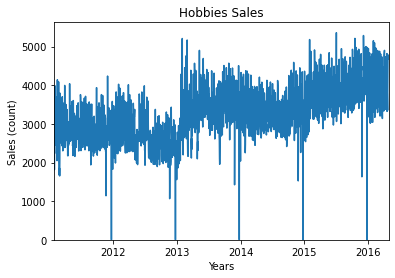

In [244]:
# # 2. HOBBIES/HOUSEHOLD/FOODS sales
# # HOBBIES sales
# categoryArray = []
# df_hobbies = sales[sales['cat_id'] == 'HOBBIES']
# for i in range(1, 1914):
#     categoryArray.append([df_hobbies['d_'+str(i)].sum()])

# plt.title('Hobbies Sales',loc='center')
# plt.plot(np.array(categoryArray))
# plt.xlabel('Years')
# x_ticks_labels = ['2012', '2013', '2014', '2015', '2016',]
# plt.xticks([337, 703, 1068, 1433, 1798], x_ticks_labels)
# plt.xlim(0, 1914)  
# plt.ylabel('Sales (count)')
# plt.ylim(ymin=0)  

['CA' 'TX' 'WI']


(0.0, 26484.95)

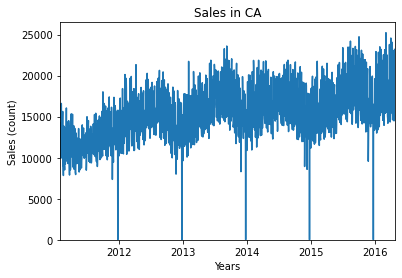

In [257]:
# #3. Sales per state
# print(sales.state_id.unique())

# #3-1. Sales in CA
# stateArray = []
# df_CA = sales[sales['state_id'] == 'CA']
# for i in range(1, 1914):
#     stateArray.append([df_CA['d_'+str(i)].sum()])

# plt.title('Sales in CA',loc='center')
# plt.plot(np.array(stateArray))
# plt.xlabel('Years')
# x_ticks_labels = ['2012', '2013', '2014', '2015', '2016',]
# plt.xticks([337, 703, 1068, 1433, 1798], x_ticks_labels)
# plt.xlim(0, 1914)  
# plt.ylabel('Sales (count)')
# plt.ylim(ymin=0) 


exception 'd_1914'
exception 'd_1914'
exception 'd_1914'


([<matplotlib.axis.YTick at 0x1235a9370>,
 [Text(0, 100000, '100k'),
  Text(0, 200000, '200k'),
  Text(0, 300000, '300k'),
  Text(0, 400000, '400k'),
  Text(0, 500000, '500k')])

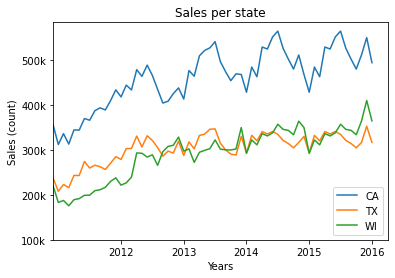

In [362]:
# . sales price
# add rows to price to match sales['id']
# price["id"] = price["item_id"] + "_" + price["store_id"]

stateArray = []
df_CA = sales[sales['state_id'] == 'CA']
df_TX = sales[sales['state_id'] == 'TX']
df_WI = sales[sales['state_id'] == 'WI']


def monthAverage(df_state, JanFst, FebDays):
    try:
        monthArray = []

        Jan = 0
        JanEnd = JanFst+31
        for i in range(JanFst, JanEnd):
            Jan += df_state['d_'+str(i)].sum()
        monthArray.append(Jan)

        Feb = 0
        FebEnd = JanEnd + FebDays
        for i in range(JanEnd, FebEnd):
            Feb += df_state['d_'+str(i)].sum()
        monthArray.append(Feb)

        Mar = 0
        MarEnd = FebEnd + 31
        for i in range(FebEnd, MarEnd):
            Mar += df_state['d_'+str(i)].sum()
        monthArray.append(Mar)

        Apr = 0
        AprEnd = MarEnd + 30 
        for i in range(MarEnd, AprEnd):
            Apr += df_state['d_'+str(i)].sum()
        monthArray.append(Apr)

        May = 0
        MayEnd = AprEnd + 31
        for i in range(AprEnd, MayEnd):
            May += df_state['d_'+str(i)].sum()
        monthArray.append(May)

        Jun = 0
        JunEnd = MayEnd + 30 
        for i in range(MayEnd, JunEnd):
            Jun += df_state['d_'+str(i)].sum()
        monthArray.append(Jun)

        July = 0
        JulyEnd = JunEnd + 31
        for i in range(JunEnd, JulyEnd):
            July += df_state['d_'+str(i)].sum()
        monthArray.append(July)

        Aug = 0
        AugEnd = JulyEnd + 31
        for i in range(JulyEnd, AugEnd):
            Aug += df_state['d_'+str(i)].sum()
        monthArray.append(Aug)

        Sep = 0
        SepEnd = AugEnd + 30
        for i in range(AugEnd, SepEnd):
            Sep += df_state['d_'+str(i)].sum()
        monthArray.append(Sep)

        Oct = 0
        OctEnd = SepEnd + 31
        for i in range(SepEnd, OctEnd):
            Oct += df_state['d_'+str(i)].sum()
        monthArray.append(Oct)

        Nov = 0
        NovEnd = OctEnd + 31
        for i in range(OctEnd, NovEnd):
            Nov += df_state['d_'+str(i)].sum()
        monthArray.append(Nov)

        Dec = 0
        DecEnd = NovEnd + 31
        for i in range(NovEnd, DecEnd):
            Dec += df_state['d_'+str(i)].sum()
        monthArray.append(Dec)
    except Exception as e:
        print('exception', e)
    
    return monthArray

def sale_per_month(df_state):
    monthArray1 = monthAverage(df_state, 1, 28)
    monthArray2 = monthAverage(df_state, 366, 29)
    monthArray3 = monthAverage(df_state, 366+366, 28)
    monthArray4 = monthAverage(df_state, 366+366+365, 28)
    monthArray5 = monthAverage(df_state, 366+366+365+365, 28)
    monthArray6 = monthAverage(df_state, 366+366+365+365+365, 28)
    monthArray_state = monthArray1 + monthArray2 + monthArray3 + monthArray5 + monthArray5 + monthArray6
    return monthArray_state

monthArray_CA = sale_per_month(df_CA)
monthArray_TX = sale_per_month(df_TX)
monthArray_WI = sale_per_month(df_WI)

plt.title('Sales per state',loc='center')
plt.plot(np.array(monthArray_CA))
plt.plot(np.array(monthArray_TX))
plt.plot(np.array(monthArray_WI))
plt.legend(loc='lower right', labels=['CA','TX','WI'])

plt.xlabel('Years')
x_ticks_labels = ['2012', '2013', '2014', '2015', '2016',]
plt.xticks([13, 25, 37, 49, 61], x_ticks_labels)
plt.xlim(xmin=0)  
plt.ylabel('Sales (count)')
y_ticks_labels = ['100k','200k', '300k', '400k', '500k']
plt.yticks([100000, 200000, 300000, 400000, 500000], y_ticks_labels)


exception 'd_1914'
exception 'd_1914'
exception 'd_1914'


([<matplotlib.axis.YTick at 0x1322771f0>,
 [Text(0, 100000, '100k'),
  Text(0, 300000, '300k'),
  Text(0, 500000, '500k'),
  Text(0, 700000, '700k'),
  Text(0, 900000, '900k')])

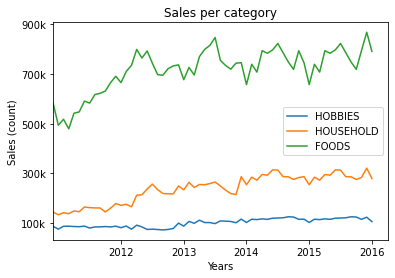

In [449]:
# Sales per category
monthArray_HOBBIES = sale_per_month(df_hobbies)
monthArray_HOUSEHOLD = sale_per_month(df_household)
monthArray_FOODS = sale_per_month(df_food)

plt.title('Sales per category',loc='center')
plt.plot(np.array(monthArray_HOBBIES))
plt.plot(np.array(monthArray_HOUSEHOLD))
plt.plot(np.array(monthArray_FOODS))
plt.legend(loc='center right', labels=['HOBBIES','HOUSEHOLD','FOODS'])

plt.xlabel('Years')
x_ticks_labels = ['2012', '2013', '2014', '2015', '2016',]
plt.xticks([13, 25, 37, 49, 61], x_ticks_labels)
plt.xlim(xmin=0)  
plt.ylabel('Sales (count)')
y_ticks_labels = ['100k','300k', '500k', '700k', '900k']
plt.yticks([100000, 300000, 500000, 700000, 900000], y_ticks_labels)

([<matplotlib.axis.YTick at 0x165f7db20>,
 [Text(0, 5000, '5k'),
  Text(0, 10000, '10k'),
  Text(0, 15000, '15k'),
  Text(0, 20000, '20k'),
  Text(0, 25000, '25k'),
  Text(0, 30000, '30k')])

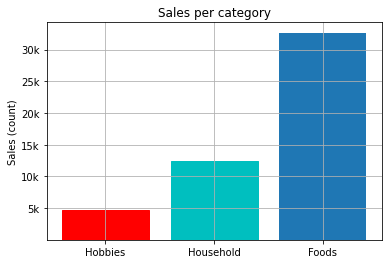

In [483]:
#Sale per category in histogram
df_hobbies = sales[sales['cat_id'] == 'HOBBIES']
df_household = sales[sales['cat_id'] == 'HOUSEHOLD']
df_foods = sales[sales['cat_id'] == 'FOODS']
for i in range(1, 1914):
    hobbies_sum = df_hobbies['d_'+str(i)].sum()
    household_sum = df_household['d_'+str(i)].sum()
    food_sum = df_foods['d_'+str(i)].sum()

plt.title('Sales per category',loc='center')
index = np.arange(3)
barlist = plt.bar(index, np.array([hobbies_sum, household_sum, food_sum]))
plt.xticks([0,1,2], ['Hobbies', 'Household', 'Foods'])
barlist[0].set_color('r')
barlist[1].set_color('c')
plt.grid(True)

plt.ylabel('Sales (count)')
y_ticks_labels = ['5k','10k', '15k', '20k', '25k', '30k']
plt.yticks([5000, 10000, 15000, 20000, 25000, 30000], y_ticks_labels)

In [444]:
def sales_per_store(df_state, state_name):
    try:
        monthArray_state_n = []
        display(df_state.store_id.unique())
        labels=df_state['store_id'].unique()
        for i in range(1, len(labels)+1):
            df_state_n = df_state[df_state['store_id'] == state_name + '_' + str(i)]
            monthArray_state_n = sale_per_month(df_state_n)
            plt.plot(np.array(monthArray_state_n))

        plt.title('Sales per store',loc='center')
        plt.legend(loc='upper left', labels=labels, prop={'size': 8})
        plt.xlabel('Years')
        x_ticks_labels = ['2012', '2013', '2014', '2015', '2016',]
        plt.xticks([13, 25, 37, 49, 61], x_ticks_labels)
        plt.xlim(xmin=0)  
        plt.ylabel('Sales (count)')
        y_ticks_labels = ['25k','50k','75k','100k','125k','150k','175k','200k']
        plt.yticks([25000,50000,75000,100000,125000,150000,175000,200000], y_ticks_labels)

    except Exception as e:
        print('exception', e)


array(['WI_1', 'WI_2', 'WI_3'], dtype=object)

exception 'd_1914'
exception 'd_1914'
exception 'd_1914'


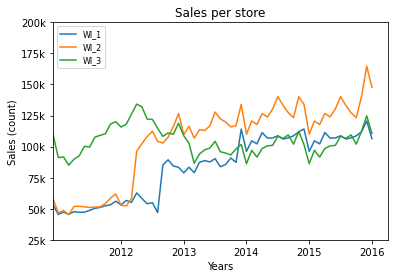

In [446]:
# sales_per_store(df_CA, 'CA')
# sales_per_store(df_TX, 'TX')
sales_per_store(df_WI, 'WI')

['HOBBIES_1' 'HOBBIES_2' 'HOUSEHOLD_1' 'HOUSEHOLD_2' 'FOODS_1' 'FOODS_2'
 'FOODS_3']
exception 'd_1914'
exception 'd_1914'
exception 'd_1914'
exception 'd_1914'
exception 'd_1914'
exception 'd_1914'
exception 'd_1914'


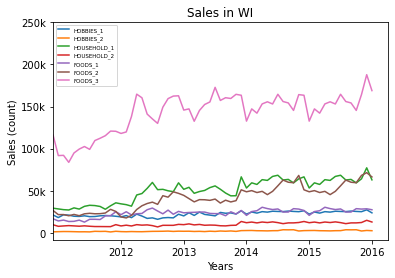

In [520]:
dept_list = sales['dept_id'].unique()
print(dept_list)

def sales_per_department(df_state, dept_id, state_name):
    try:
        for i in range(len(dept_list)):
            df_dept_n = df_state[df_state['dept_id'] == dept_list[i]]
            monthArray_dept_n = sale_per_month(df_dept_n)
            plt.plot(np.array(monthArray_dept_n))

            
        plt.title('Sales in '+state_name ,loc='center')
        plt.legend(loc='upper left', labels=dept_list, prop={'size': 5.5})
        plt.xlabel('Years')
        x_ticks_labels = ['2012', '2013', '2014', '2015', '2016',]
        plt.xticks([13, 25, 37, 49, 61], x_ticks_labels)
        plt.xlim(xmin=0)  
        plt.ylabel('Sales (count)')
        y_ticks_labels = ['0','50k','100k','150k','200k','250k']
        plt.yticks([0,50000,100000,150000,200000,250000], y_ticks_labels)

    except Exception as e:
        print('exception', e)

# sales_per_department(df_CA, dept_list, 'CA')
# sales_per_department(df_TX, dept_list, 'TX')
sales_per_department(df_WI, dept_list, 'WI')        

In [ ]:
# distribution 

exception 'd_1914'


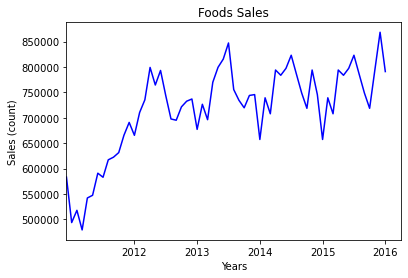

In [534]:
#Sale per category 
df_hobbies = sales[sales['cat_id'] == 'HOBBIES']
df_household = sales[sales['cat_id'] == 'HOUSEHOLD']
df_foods = sales[sales['cat_id'] == 'FOODS']

def category_sales_per_month(df_category, category_name, color):
    monthArray = sale_per_month(df_category)
    plt.title(category_name,loc='center')
    plt.plot(np.array(monthArray), c=color)
    plt.xlabel('Years')
    x_ticks_labels = ['2012', '2013', '2014', '2015', '2016',]
    plt.xticks([13, 25, 37, 49, 61], x_ticks_labels)
    plt.xlim(xmin=0)  
    plt.ylabel('Sales (count)')

# category_sales_per_month(df_hobbies, 'Hobbies Sales', 'r')
# category_sales_per_month(df_household, 'Household Sales', 'g')
category_sales_per_month(df_foods, 'Foods Sales', 'b')


In [ ]:
# Weekly sales trends by category
# Monthly sales trends by category

# weekly sales trends by state
# Monthly sales trends by state

# sales price by week


In [ ]:

# print(np.std(df_CA['d_1'], ddof=1))
# print(df_CA['d_1'].describe())

x_tick = [337, 703, 1068, 1433, 1798]
# sales.head()


eventTypeList: 162
eventTypeList_unique: ['Sporting', 'Cultural', 'National', 'Religious']
18
37
52
55
Event day percentage: 0.08227526663280849 %


([<matplotlib.axis.YTick at 0x1e2193fa0>,
 [Text(0, 0.0, '0'),
  Text(0, 0.2, '20%'),
  Text(0, 0.4, '40%'),
  Text(0, 0.6, '60%'),
  Text(0, 0.8, '80%')])

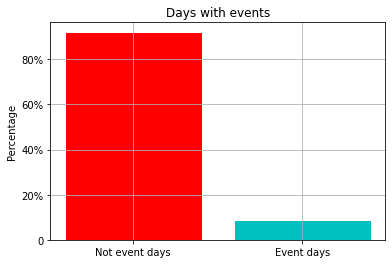

In [592]:
# Analyze days with event
DaysWithEvent = []
for i in range(len(calendar.event_name_1)):
    name1 =calendar.event_name_1[i]
    name2 =calendar.event_name_2[i]
    if str(name1) != 'nan' or str(name2) != 'nan':
        DaysWithEvent.append(True)

withoutEvent = (1969-int(len(DaysWithEvent)))/1969
withEvent = 1 - withoutEvent
print('Event day percentage:',withEvent, '%')

plt.title('Days with events',loc='center')
index = np.arange(2)
barlist = plt.bar(index, np.array([withoutEvent, withEvent]))
plt.xticks([0,1], ['Not event days', 'Event days'])
barlist[0].set_color('r')
barlist[1].set_color('c')
plt.grid(True)

plt.ylabel('Percentage')
y_ticks_labels = ['0','20%','40%','60%','80%']
plt.yticks([0,0.2,0.4,0.6,0.8], y_ticks_labels)

eventTypeList: 162
eventTypeList_unique: ['Sporting', 'Cultural', 'National', 'Religious']
sport 0.1111111111111111
cultural 0.22839506172839505
national 0.32098765432098764
religious 0.3395061728395062


([<matplotlib.axis.YTick at 0x1893bd7f0>,
 [Text(0, 0.0, '0'),
  Text(0, 0.1, '10%'),
  Text(0, 0.2, '20%'),
  Text(0, 0.3, '30%')])

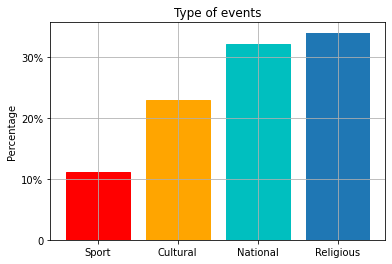

In [625]:
# Analyze type of event
eventTypeList = []
eventTypeList_unique = []

for i in range(len(calendar.event_name_1)):
    eventType = calendar.event_type_1[i]
    if str(eventType) != 'nan':
        eventTypeList.append(eventType)
        if eventType not in eventTypeList_unique:
            eventTypeList_unique.append(eventType)
        
print('eventTypeList:', len(eventTypeList))
print('eventTypeList_unique:', eventTypeList_unique)

sport = eventTypeList.count('Sporting')/int(len(eventTypeList))
cultural = eventTypeList.count('Cultural')/int(len(eventTypeList))
national = eventTypeList.count('National')/int(len(eventTypeList))
religious = eventTypeList.count('Religious')/int(len(eventTypeList))
print('sport', sport)
print('cultural', cultural)
print('national', national)
print('religious', religious)


plt.title('Type of events',loc='center')
index = np.arange(4)
barlist = plt.bar(index, np.array([sport,cultural,national,religious]))
plt.xticks([0,1,2,3], ['Sport', 'Cultural','National' ,'Religious'])
barlist[0].set_color('r')
barlist[1].set_color('orange')
barlist[2].set_color('c')
plt.grid(True)

plt.ylabel('Percentage')
y_ticks_labels = ['0','10%','20%','30%']
plt.yticks([0,0.1,0.2,0.3], y_ticks_labels)


650

650

650

SNAP day percentage: 0.330116810563738 %


([<matplotlib.axis.YTick at 0x1892512e0>,
 [Text(0, 0.0, '0'),
  Text(0, 0.1, '10%'),
  Text(0, 0.3, '30%'),
  Text(0, 0.5, '50%'),
  Text(0, 0.7, '70%')])

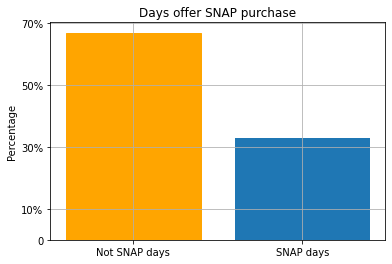

In [627]:
display(calendar.snap_CA.sum())
display(calendar.snap_TX.sum())
display(calendar.snap_WI.sum())

snap = calendar.snap_CA.sum()
withoutSNAP = (1969-snap)/1969
withSNAP = 1 - withoutSNAP
print('SNAP day percentage:',withSNAP, '%')

plt.title('Days offer SNAP purchase',loc='center')
index = np.arange(2)
barlist = plt.bar(index, np.array([withoutSNAP, withSNAP]))
plt.xticks([0,1], ['Not SNAP days', 'SNAP days'])
barlist[0].set_color('orange')
plt.grid(True)

plt.ylabel('Percentage')
y_ticks_labels = ['0','10%','30%','50%','70%']
plt.yticks([0,0.1,0.3,0.5,0.7], y_ticks_labels)

In [633]:
display(calendar[calendar['snap_CA'] == 1].head(20))
display(calendar[calendar['snap_TX'] == 1].head(20))
display(calendar[calendar['snap_WI'] == 1].head(20))


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0
10,2011-02-08,11102,Tuesday,4,2,2011,d_11,NaN,NaN,NaN,NaN,1,0,1
11,2011-02-09,11102,Wednesday,5,2,2011,d_12,NaN,NaN,NaN,NaN,1,1,1
12,2011-02-10,11102,Thursday,6,2,2011,d_13,NaN,NaN,NaN,NaN,1,0,0


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0
11,2011-02-09,11102,Wednesday,5,2,2011,d_12,NaN,NaN,NaN,NaN,1,1,1
13,2011-02-11,11102,Friday,7,2,2011,d_14,NaN,NaN,NaN,NaN,0,1,1
14,2011-02-12,11103,Saturday,1,2,2011,d_15,NaN,NaN,NaN,NaN,0,1,1
15,2011-02-13,11103,Sunday,2,2,2011,d_16,NaN,NaN,NaN,NaN,0,1,0
17,2011-02-15,11103,Tuesday,4,2,2011,d_18,NaN,NaN,NaN,NaN,0,1,1


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
10,2011-02-08,11102,Tuesday,4,2,2011,d_11,NaN,NaN,NaN,NaN,1,0,1
11,2011-02-09,11102,Wednesday,5,2,2011,d_12,NaN,NaN,NaN,NaN,1,1,1
13,2011-02-11,11102,Friday,7,2,2011,d_14,NaN,NaN,NaN,NaN,0,1,1
14,2011-02-12,11103,Saturday,1,2,2011,d_15,NaN,NaN,NaN,NaN,0,1,1
16,2011-02-14,11103,Monday,3,2,2011,d_17,ValentinesDay,Cultural,NaN,NaN,0,0,1
17,2011-02-15,11103,Tuesday,4,2,2011,d_18,NaN,NaN,NaN,NaN,0,1,1


In [643]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [667]:
price[price.store_id == 'CA_2'] 

,store_id,item_id,wm_yr_wk,sell_price
698412,CA_2,HOBBIES_1_001,11327,8.26
698413,CA_2,HOBBIES_1_001,11328,8.26
698414,CA_2,HOBBIES_1_001,11329,8.26
698415,CA_2,HOBBIES_1_001,11330,8.26
698416,CA_2,HOBBIES_1_001,11331,8.26
...,...,...,...,...
1335802,CA_2,FOODS_3_827,11617,1.00
1335803,CA_2,FOODS_3_827,11618,1.00
1335804,CA_2,FOODS_3_827,11619,1.00
1335805,CA_2,FOODS_3_827,11620,1.00


In [668]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [4]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [5]:
price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [49]:
# price of each category in CA/TX/WI

# allItem = price.item_id.unique()
# allItem = ['HOBBIES_1_001','HOBBIES_1_002']

# for i in range(len(allItem)):
#     statePrice = price[price.store_id=='CA_1']
#     itemPrice = statePrice[statePrice.item_id == allItem[i]].sell_price

allItem = price.item_id.unique()[1:2000]
priceList = []
for item in allItem:
    if 'HOBBIES' in item:
        df_itemPrice = statePrice[statePrice.item_id == item].sell_price
        df.
        priceList.append(itemPrice)
print(priceList)


[154    3.97
155    3.97
156    3.97
157    3.97
158    3.97
       ... 
411    3.97
412    3.97
413    3.97
414    3.97
415    3.97
Name: sell_price, Length: 262, dtype: float64, 416    2.97
417    2.97
418    2.97
419    2.97
420    2.97
       ... 
536    2.97
537    2.97
538    2.97
539    2.97
540    2.97
Name: sell_price, Length: 125, dtype: float64, 541    4.34
542    4.34
543    4.34
544    4.34
545    4.34
       ... 
813    4.64
814    4.64
815    4.64
816    4.64
817    4.64
Name: sell_price, Length: 277, dtype: float64, 818     2.98
819     2.98
820     2.98
821     2.98
822     2.98
        ... 
1079    2.88
1080    2.88
1081    2.88
1082    2.88
1083    2.88
Name: sell_price, Length: 266, dtype: float64, 1084    1.00
1085    1.00
1086    1.00
1087    1.00
1088    1.00
        ... 
1300    0.96
1301    0.96
1302    0.96
1303    0.96
1304    0.96
Name: sell_price, Length: 221, dtype: float64, 1305    7.94
1306    7.94
1307    7.94
1308    7.94
1309    7.94
        ... 
1507

In [55]:
level_groupings = {2: ["state_id"], 3: ["store_id"], 4: ["cat_id"], 5: ["dept_id"], 
              6: ["state_id", "cat_id"], 7: ["state_id", "dept_id"], 8: ["store_id", "cat_id"], 9: ["store_id", "dept_id"],
              10: ["item_id"], 11: ["item_id", "state_id"]}

In [56]:
display(sales.groupby(by=level_groupings[11]).sum())


d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  \
item_id         state_id                                                      
FOODS_1_001     CA          6    3    2    3    7    5    8    3    5     2   
                TX          0    1    2    2    0    4    0    0    4     3   
                WI          0    2    0    1    0    9    2    1    2     5   
FOODS_1_002     CA          3    3    4    4    3    3    0    2    1     1   
                TX          0    0    2    0    0    0    0    1    0     0   
...                       ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
HOUSEHOLD_2_515 TX          0    0    0    0    0    0    0    0    0     0   
                WI          0    0    0    0    0    0    0    0    0     0   
HOUSEHOLD_2_516 CA          0    2    0    1    1    1    0    2    1     2   
                TX          2    1    0    0    0    0    1    1    0     0   
                WI          0    1    0    2    0    1    1    1    0     0   

                          ...  d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  \
item_id         state_id  ...                                                   
FOODS_1_001     CA        ...       1       2      27       6       2       2   
                TX        ...       3       1       2       1       0       0   
                WI        ...       0       1       1       0       3       1   
FOODS_1_002     CA        ...       3       5       2       0       0       2   
                TX        ...       1       1       0       0       2       1   
...                       ...     ...     ...     ...     ...     ...     ...   
HOUSEHOLD_2_515 TX        ...       0       0       0       0       0       0   
                WI        ...       0       1       0       0       0       1   
HOUSEHOLD_2_516 CA        ...       3       0       0       0       0       0   
                TX        ...       0       1       1       0       0       1   
                WI        ...       1       0       0       0       0       0   

                          d_1910  d_1911  d_1912  d_1913  
item_id         state_id                                  
FOODS_1_001     CA             4       2       3       5  
                TX             2       0       1       0  
                WI             0       0      12       1  
FOODS_1_002     CA             2       1       2       1  
                TX             0       0       0       0  
...                          ...     ...     ...     ...  
HOUSEHOLD_2_515 TX             0       0       0       0  
                WI             1       1       1       0  
HOUSEHOLD_2_516 CA             1       1       0       1  
                TX             0       0       0       0  
                WI             1       0       0       0  

[9147 rows x 1913 columns]

In [57]:
price["id"] = price["item_id"] + "_" + price["store_id"] + "_validation"

In [58]:
price.head()

,store_id,item_id,wm_yr_wk,sell_price,id
0,CA_1,HOBBIES_1_001,11325,9.58,HOBBIES_1_001_CA_1_validation
1,CA_1,HOBBIES_1_001,11326,9.58,HOBBIES_1_001_CA_1_validation
2,CA_1,HOBBIES_1_001,11327,8.26,HOBBIES_1_001_CA_1_validation
3,CA_1,HOBBIES_1_001,11328,8.26,HOBBIES_1_001_CA_1_validation
4,CA_1,HOBBIES_1_001,11329,8.26,HOBBIES_1_001_CA_1_validation


In [272]:
price["cat_id"] = price["item_id"].apply(lambda x: str(x.split("_")[0]))
price["state_id"] = price["store_id"].apply(lambda x: str(x.split("_")[0]))

In [274]:
df_ca_foods = df_ca[df_ca.cat_id == 'FOODS']
df_ca_foods

,store_id,item_id,wm_yr_wk,sell_price,id,cat_id,state_id
368746,CA_1,FOODS_1_001,11101,2.0,FOODS_1_001_CA_1_validation,FOODS,CA
368747,CA_1,FOODS_1_001,11102,2.0,FOODS_1_001_CA_1_validation,FOODS,CA
368748,CA_1,FOODS_1_001,11103,2.0,FOODS_1_001_CA_1_validation,FOODS,CA
368749,CA_1,FOODS_1_001,11104,2.0,FOODS_1_001_CA_1_validation,FOODS,CA
368750,CA_1,FOODS_1_001,11105,2.0,FOODS_1_001_CA_1_validation,FOODS,CA
...,...,...,...,...,...,...,...
2708817,CA_4,FOODS_3_827,11617,1.0,FOODS_3_827_CA_4_validation,FOODS,CA
2708818,CA_4,FOODS_3_827,11618,1.0,FOODS_3_827_CA_4_validation,FOODS,CA
2708819,CA_4,FOODS_3_827,11619,1.0,FOODS_3_827_CA_4_validation,FOODS,CA
2708820,CA_4,FOODS_3_827,11620,1.0,FOODS_3_827_CA_4_validation,FOODS,CA
